In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
from random import sample
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Clustering

We have a given dataset 

$$
    X \in \mathbb{R}^{m \times n},
$$

where $m$ is the number of samples and $n$ is the number of features.

In the dateset we only have features and no targets, what differs from regression and classification problems.

We say that 

$$
    X^{(i)} \in \mathbb{R}^{1 \times n}
$$

is the $i$-th example ($i = 1, \dots, m$) and 

$$
    X_j \in \mathbb{R}^m
$$ 

is the $j$-th feature vector ($j = 1, \dots, n$), such that 

$$
    X^{(i)}_j \in \mathbb{R}  
$$

is the $j$-th feature of the $i$-th example.

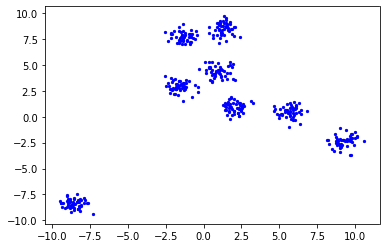

In [9]:
# Set number of samples, features, clusters
m, n, k = 400, 2, 8

# Load example dataset
X, y = make_blobs(n_samples=m, n_features=n, centers=k, cluster_std=0.5,
                  shuffle=True, random_state=0)

# Plot datapoints
plt.scatter(X[:,0], X[:,1], c='b', s=5)
plt.show()

## K-means

### Goal

Assign a cluster $c^{(i)} \in \mathbb{N}$ to every sample $x^{(i)}$.

### Cost function

$$
    J(c, \mu) = \sum_{i=1}^m \| X^{(i)} - \mu_{c^{(i)}} \|,
$$

where $\mu_{c^{(i)}} \in \mathbb{R}^n$ is the the cluster centroid of the cluster $c^{(i)}$.

### Algorithm

1. Randomly initialize $k$ datapoints as cluster centroids $\mu_1, \mu_2, ..., \mu_k \in \mathbb{R}^n$.
2. 


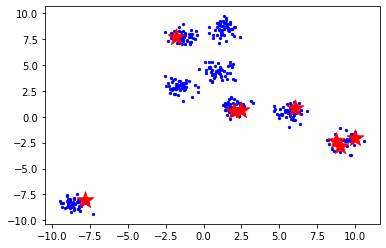

In [14]:
# Randomly choose k datapoints as centroids
centroids = X[sample(range(len(X)), k)]

# Plot datapoints with centroids
plt.scatter(X[:,0], X[:,1], c='b', s=5)
plt.scatter(centroids[:,0], centroids[:,1], s=300, marker='*', c='r')
plt.show()

In [15]:
# Simple KMeans algorithm.

# Set number of runs (with different centroid seeds)
n_runs = 100

# Lists to save the runs
all_costs = []
all_centroids = []
all_clusters = []
all_starting_centroids = []

# Iterate over all number of runs
# TODO: Parallelize
for run in range(n_runs):
    
    # Choose random starting centroids
    if run > 0:
        centroids = X[sample(range(len(X)), k)]
    
    # Save starting centroids
    all_starting_centroids.append(deepcopy(centroids))
    
    # Initialize old centroids (to compute error)
    centroids_old = np.zeros(centroids.shape)
    
    # Initialize array to store index of cluster datapoint gets assigned to
    clusters = np.zeros(len(X))

    # Set error > 0 
    error = 1
    
    # Break if centroids does not change
    while error > 0:

        # Replace nan values with zeros
        centroids[np.isnan(centroids)] = 0
        
        # Save old centroids for error check
        centroids_old = deepcopy(centroids)
        
        # Cluster assignment step
        for i, datapoint in enumerate(X):

            # Get euclidean distance of datapoint to all centroids
            distances = np.linalg.norm(datapoint - centroids, axis=1)
            clusters[i] = np.argmin(distances)

        # Centroid movement step
        for i, centroid in enumerate(centroids):
            points = [X[j] for j in range(len(X)) if i == clusters[j]]
            centroids[i] = np.mean(points, axis=0)

        # Compute the error
        error = np.sum(np.linalg.norm(centroids_old - centroids, axis=1))
      
    # Compute cost
    assigned_centroids = []
    for i, datapoint in enumerate(X):
        assigned_centroids.append([centroids[j] for j in range(len(centroids)) if j == clusters[i]][0])
    cost = np.sum( np.linalg.norm(X - assigned_centroids, axis=0) ) / len(X)
    
    # Print run
    print('run, cost = ' + str((run + 1, cost)))
    
    # Save run
    all_costs.append(cost)
    all_centroids.append(deepcopy(centroids))
    all_clusters.append(deepcopy(clusters))

run, cost = (1, 0.08309205208536896)
run, cost = (2, 0.04913769962009759)
run, cost = (3, 0.06666326383121526)
run, cost = (4, 0.08325358039419214)
run, cost = (5, 0.04913769962009759)
run, cost = (6, 0.06706806485745267)
run, cost = (7, 0.06665308544245885)
run, cost = (8, 0.09686759316995655)
run, cost = (9, 0.06718618082813058)
run, cost = (10, 0.07530879599028957)
run, cost = (11, 0.06686982998563919)
run, cost = (12, 0.09036020572671165)
run, cost = (13, 0.04913769962009759)
run, cost = (14, 0.13004338117326278)
run, cost = (15, 0.04913769962009759)
run, cost = (16, 0.07623434134888875)
run, cost = (17, 0.1181161063955651)
run, cost = (18, 0.07563187484304194)
run, cost = (19, 0.04913769962009759)
run, cost = (20, 0.04913769962009759)
run, cost = (21, 0.07032751371442063)
run, cost = (22, 0.11820342645543427)
run, cost = (23, 0.06703320807153144)
run, cost = (24, 0.06662176377799017)
run, cost = (25, 0.06716784295501074)
run, cost = (26, 0.09084149126189485)
run, cost = (27, 0.049

In [16]:
def plot_clusters_2d(X, y, k, centers=None):
    '''
    Plots up to 8 clustes in different colors.
    
    Parameters
    ----------
    X : ndarray of shape (n_samples, n_features)
        The input samples to assign to the labels.
        
    y : ndarry of shape (n_samples,)
        The integer labels for cluster membership of each sample.
        
    k : int
        The number of clusters.
    
    centers : ndarray of shape (n_clusters, n_features)
        The cluster centers.
    '''
    
    # Set of colors 
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'gray']

    # Iterate over number of clusters
    for i in range(k):
        
        # Plot datapoints in color of related cluster 
        points = np.array([X[j] for j in range(len(X)) if y[j] == i])
        plt.scatter(points[:, 0], points[:, 1], c=colors[i], s=5)
    
        # Plot centroids
        if centers is not None:
            plt.scatter(centers[i, 0], centers[i, 1], s=300, marker='*', c=colors[i])

best run, cost = (1, 0.04913769962009759)


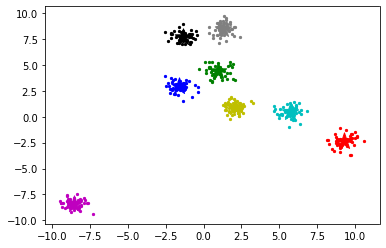

In [17]:
# Compute best run
best_run = np.argmin(np.array(all_costs))

# Print number of run and costs
print('best run, cost = ' + str((best_run, all_costs[best_run])))

# Plot clusters and centroids of best run
plot_clusters_2d(X, all_clusters[best_run], k, all_centroids[best_run])

best run, cost = (0, 0.08309205208536896)


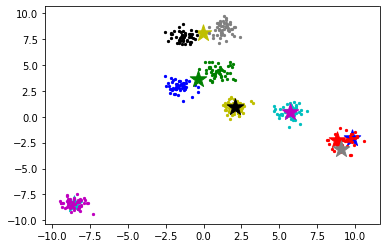

In [18]:
# Choose specific run
spec_run = 0

# Print number of run and costs
print('best run, cost = ' + str((spec_run, all_costs[spec_run])))

# Plot clusters and centroids of best run
plot_clusters_2d(X, all_clusters[best_run], k, all_centroids[spec_run])

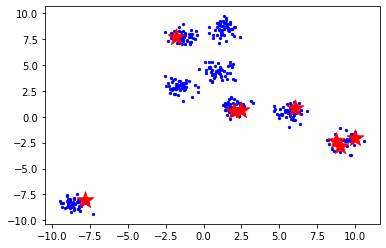

In [19]:
# Plot starting centroids of specific run
centroids = all_starting_centroids[spec_run]
plt.scatter(X[:,0], X[:,1], c='b', s=5)
plt.scatter(centroids[:,0], centroids[:,1], s=300, marker='*', c='red')

# Scikit-learn

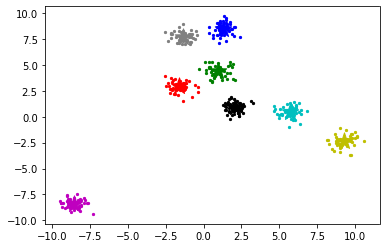

In [23]:
# Apply KMeans with same settings like custom implementation
kmeans = KMeans(k, init='random', n_init=100)

# Train KMeans
kmeans.fit(X)

# Plot datapoints with clusters and centroids
plot_clusters_2d(X, kmeans.labels_, k, kmeans.cluster_centers_)

### How to choose k?

In [24]:
# Function to compute distortion
distortion = lambda X, y: sum(np.min(
    cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]

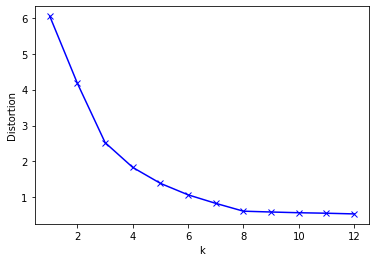

In [25]:
# Function to compute distortion
distortion = lambda X, y: sum(np.min(
    cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]

#  Get disortion and inertia for an increasing number of clusters
distortions, inertias = [], []
K = range(1, 13)
for k in K:
    kmeans.n_clusters = k
    kmeans.fit(X)
    distortions.append(distortion(X, kmeans.cluster_centers_))
    inertias.append(kmeans.inertia_)
    
# Plot the elbow for distortion
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

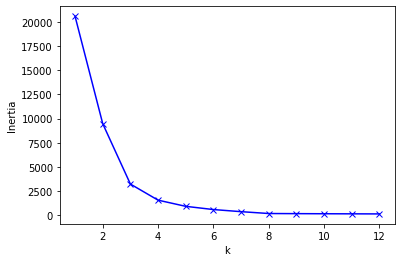

In [26]:
# Plot the elbow for inertia
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()